In [25]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

import sys
sys.path.append('../')
from helpers import cm2inch, title, show_num_contours, load_datasets
from melodic_contour import *
matplotlib.style.use('styles.mplstyle')

from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
import tslearn
from tslearn.metrics import cdist_dtw

from scipy.spatial import distance_matrix
from unidip.dip import diptst as diptest

In [26]:
dfs, all_contours = load_datasets(normalize=False)

In [27]:
def filter_contours(name, min_length=6, max_length=10, dfs=dfs, N=500):
    np.random.seed(0)
    df = dfs[name]
    okay = (df['phrase_length'] >= min_length) & (df['phrase_length'] <= max_length)
    contours = all_contours[name][okay]
    indices = np.random.choice(np.arange(len(contours)), N, replace=False)
    return contours[indices, :], indices

In [28]:
N = 500
erk, erk_idx = filter_contours('erk', 0, np.inf, N=N)
han, han_idx = filter_contours('han', 0, np.inf, N=N)
gre, gre_idx = filter_contours('liber-antiphons', 0, np.inf, N=N)

In [38]:
erk_lengths = dfs['erk']['phrase_length'].values[erk_idx]
erk_durations = dfs['erk']['phrase_duration'].values[erk_idx]
han_lenghts = dfs['han']['phrase_length'].values[han_idx]
han_durations = dfs['han']['phrase_duration'].values[han_idx]
gre_lengths = dfs['liber-antiphons']['phrase_length'].values[gre_idx]
gre_durations = dfs['liber-antiphons']['phrase_duration'].values[gre_idx]

In [39]:
contours = np.concatenate((erk, han, gre), axis=0)
lengths = np.concatenate((erk_lengths, han_lenghts, gre_lengths), axis=0)
durations = np.concatenate((erk_durations, han_durations, gre_durations), axis=0)

In [40]:
centered_contours = contours - contours.mean(axis=1)[:, np.newaxis]

In [31]:
mds = MDS(n_components=2, random_state=0, dissimilarity='precomputed', metric=True)
nonmetric_mds = MDS(n_components=2, random_state=0, dissimilarity='precomputed', metric=False)

In [33]:
dm = distance_matrix(centered_contours, centered_contours)
X = mds.fit_transform(dm)

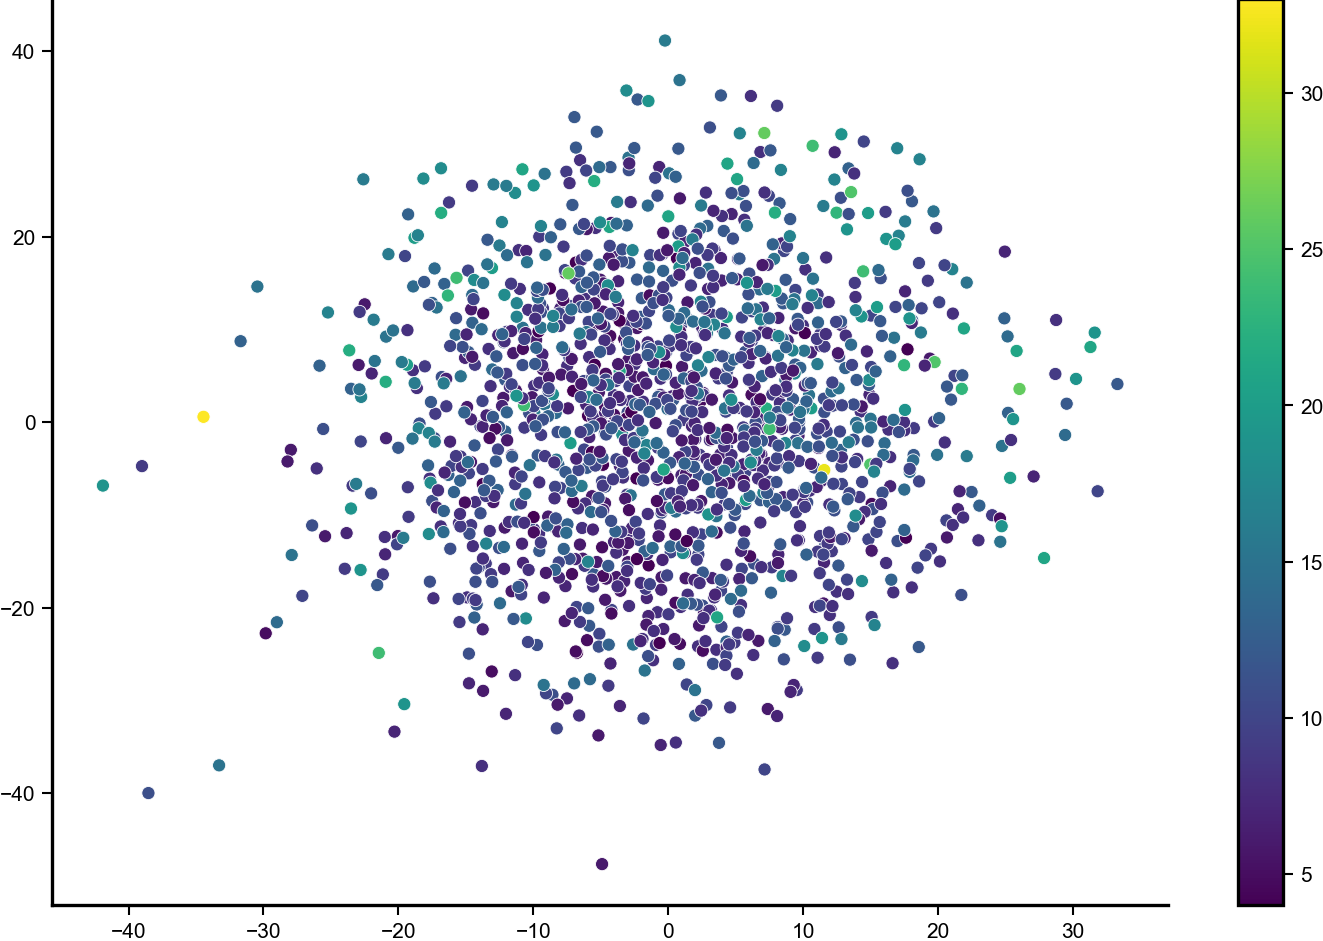

In [56]:
x, y = X.T
plt.scatter(x, y, s=10, c=lengths, cmap='viridis', edgecolor='w', lw=.2)
plt.colorbar()

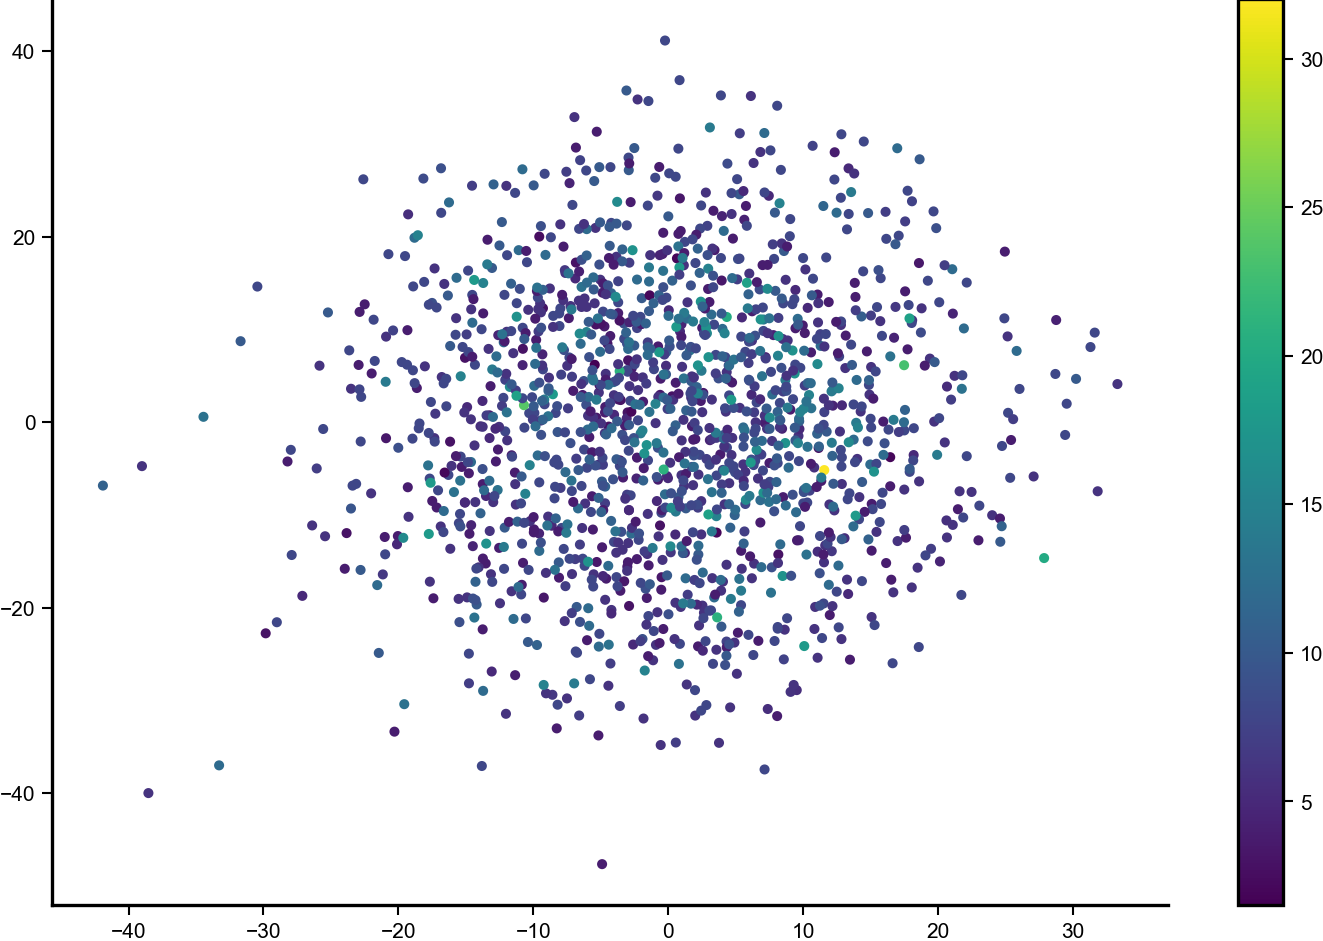

In [47]:
x, y = X.T
plt.scatter(x, y, s=2, c=durations, cmap='viridis')
plt.colorbar()